In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle


In [12]:
# Read the Turkish animal production Excel file
file_path = r"D:\suat\gitrepo\agrodatazoom\data\raw\turkey\tuik\tr-animal-prod.xls"
df = pd.read_excel(file_path, sheet_name=sheet)


SyntaxError: invalid syntax (3234938751.py, line 13)

In [7]:
df.rename(columns={df.columns[0]: "Category"}, inplace=True)


In [9]:
df.rename(columns={df.columns[1]: "Year"}, inplace=True)


Şimdi bu verid df setine bak. Bir grafik düşün. Bu grafiği 2 kolon düşün solda şu illere ait yani tkdk nın olduğu iller:  Tokat, Trabzon, Van, Yozgat, Ağrı, Aksaray, Ankara, Ardahan, Aydın, Burdur, Bursa, Çanakkale, Çankırı, Denizli, Elazığ, Erzincan, Giresun, Karaman, Kastamonu, Kütahya, Manisa, Mardin, Mersin, Muş, Nevşehir ve Uşak.  sağda kalan illere ait verileri görselleştireceksin. Kolon 1 ve Kolon 2'de her il için ayrı olarak "Category" ve "Year" kolonlarını alarak trend grafikleri yapacaksın her bir "Category" için. Amacım TKDK'nın olduğu ve olmadığı illeri kıyaslamak

In [10]:
df


,Category,Year,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,Ardahan-75,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
0,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2004,19879.587,18063.420,98295.930,64387.437,16561.327,45780.350,20833.920,6209.280,...,3222.208,24088.614,6723.662,128641.075,10338.284,50671.102,19598.862,209326.118,8493.114,1212.628
1,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2005,21539.375,17020.562,129434.386,87506.361,22958.919,61410.050,19915.925,6209.280,...,4213.657,31127.617,7004.962,146296.102,8353.717,52687.248,19845.948,221144.851,8764.511,1025.536
2,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2006,14392.190,18108.761,133857.284,92788.335,30332.799,57849.319,22145.806,10707.774,...,7114.915,26368.632,9123.878,165068.165,7730.543,56846.407,18857.604,360357.648,9051.872,1285.385
3,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2007,17440.393,23999.689,158763.158,96559.764,30271.377,75106.973,32738.552,16674.504,...,6981.451,30732.877,35822.842,193380.502,6417.086,60950.704,19714.168,427416.797,9422.248,3738.357
4,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2008,21776.036,24474.033,186628.112,92883.773,29754.139,73398.626,35404.643,16955.862,...,7941.122,31364.461,29698.469,202501.886,10338.284,70527.399,19786.647,411912.211,9502.070,2401.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,"01.49.26.00.01. (Balmumu, Arı) ve Ton",2020,493.451,24.291,25.772,3.054,19.632,20.233,101.161,1.075,...,10.706,12.703,16.057,82.519,18.076,16.270,17.733,45.971,18.330,24.763
333,"01.49.26.00.01. (Balmumu, Arı) ve Ton",2021,459.477,18.019,10.000,2.961,15.617,24.116,115.409,1.830,...,8.227,21.805,15.259,86.336,16.639,18.432,18.813,180.641,18.780,25.740
334,"01.49.26.00.01. (Balmumu, Arı) ve Ton",2022,436.717,17.241,10.782,1.105,17.979,28.858,116.215,2.597,...,8.919,27.977,14.310,89.414,21.983,29.743,29.542,71.964,26.249,23.334
335,"01.49.26.00.01. (Balmumu, Arı) ve Ton",2023,329.087,17.330,10.952,3.798,17.352,31.674,131.482,1.719,...,5.163,27.018,11.987,94.432,21.222,32.688,27.803,124.742,25.028,25.305


In [17]:
# First, let's check the data structure
print("Data shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nCategories:")
print(df['Category'].unique())


Data shape: (337, 83)

Column names:
['Category', 'Year', 'Adana-1', 'Adıyaman-2', 'Afyonkarahisar-3', 'Aksaray-68', 'Amasya-5', 'Ankara-6', 'Antalya-7', 'Ardahan-75', 'Artvin-8', 'Aydın-9', 'Ağrı-4', 'Balıkesir-10', 'Bartın-74', 'Batman-72', 'Bayburt-69', 'Bilecik-11', 'Bingöl-12', 'Bitlis-13', 'Bolu-14', 'Burdur-15', 'Bursa-16', 'Denizli-20', 'Diyarbakır-21', 'Düzce-81', 'Edirne-22', 'Elazığ-23', 'Erzincan-24', 'Erzurum-25', 'Eskişehir-26', 'Gaziantep-27', 'Giresun-28', 'Gümüşhane-29', 'Hakkari-30', 'Hatay-31', 'Isparta-32', 'Iğdır-76', 'Kahramanmaraş-46', 'Karabük-78', 'Karaman-70', 'Kars-36', 'Kastamonu-37', 'Kayseri-38', 'Kilis-79', 'Kocaeli-41', 'Konya-42', 'Kütahya-43', 'Kırklareli-39', 'Kırıkkale-71', 'Kırşehir-40', 'Malatya-44', 'Manisa-45', 'Mardin-47', 'Mersin-33', 'Muğla-48', 'Muş-49', 'Nevşehir-50', 'Niğde-51', 'Ordu-52', 'Osmaniye-80', 'Rize-53', 'Sakarya-54', 'Samsun-55', 'Siirt-56', 'Sinop-57', 'Sivas-58', 'Tekirdağ-59', 'Tokat-60', 'Trabzon-61', 'Tunceli-62', 'Uşak-64'

In [26]:
# Define TKDK provinces
tkdk_provinces = [
    'Tokat', 'Trabzon', 'Van', 'Yozgat', 'Ağrı', 'Aksaray', 'Ankara', 'Ardahan', 
    'Aydın', 'Burdur', 'Bursa', 'Çanakkale', 'Çankırı', 'Denizli', 'Elazığ', 
    'Erzincan', 'Giresun', 'Karaman', 'Kastamonu', 'Kütahya', 'Manisa', 
    'Mardin', 'Mersin', 'Muş', 'Nevşehir', 'Uşak'
]

# Find columns that contain TKDK province names and add tk_ prefix
rename_dict = {}
for col in df.columns:
    if col not in ['Category', 'Year']:  # Skip metadata columns
        for province in tkdk_provinces:
            if province in col:
                rename_dict[col] = 'tk_' + col
                break

df.rename(columns=rename_dict, inplace=True)

print(f"TKDK province columns renamed: {len(rename_dict)}")
for old_name, new_name in rename_dict.items():
    print(f"  {old_name} -> {new_name}")


TKDK province columns renamed: 26
  Aksaray-68 -> tk_Aksaray-68
  Ankara-6 -> tk_Ankara-6
  Ardahan-75 -> tk_Ardahan-75
  Aydın-9 -> tk_Aydın-9
  Ağrı-4 -> tk_Ağrı-4
  Burdur-15 -> tk_Burdur-15
  Bursa-16 -> tk_Bursa-16
  Denizli-20 -> tk_Denizli-20
  Elazığ-23 -> tk_Elazığ-23
  Erzincan-24 -> tk_Erzincan-24
  Giresun-28 -> tk_Giresun-28
  Karaman-70 -> tk_Karaman-70
  Kastamonu-37 -> tk_Kastamonu-37
  Kütahya-43 -> tk_Kütahya-43
  Manisa-45 -> tk_Manisa-45
  Mardin-47 -> tk_Mardin-47
  Mersin-33 -> tk_Mersin-33
  Muş-49 -> tk_Muş-49
  Nevşehir-50 -> tk_Nevşehir-50
  Tokat-60 -> tk_Tokat-60
  Trabzon-61 -> tk_Trabzon-61
  Uşak-64 -> tk_Uşak-64
  Van-65 -> tk_Van-65
  Yozgat-66 -> tk_Yozgat-66
  Çanakkale-17 -> tk_Çanakkale-17
  Çankırı-18 -> tk_Çankırı-18


TKDK provinces found: 26
Other provinces found: 55


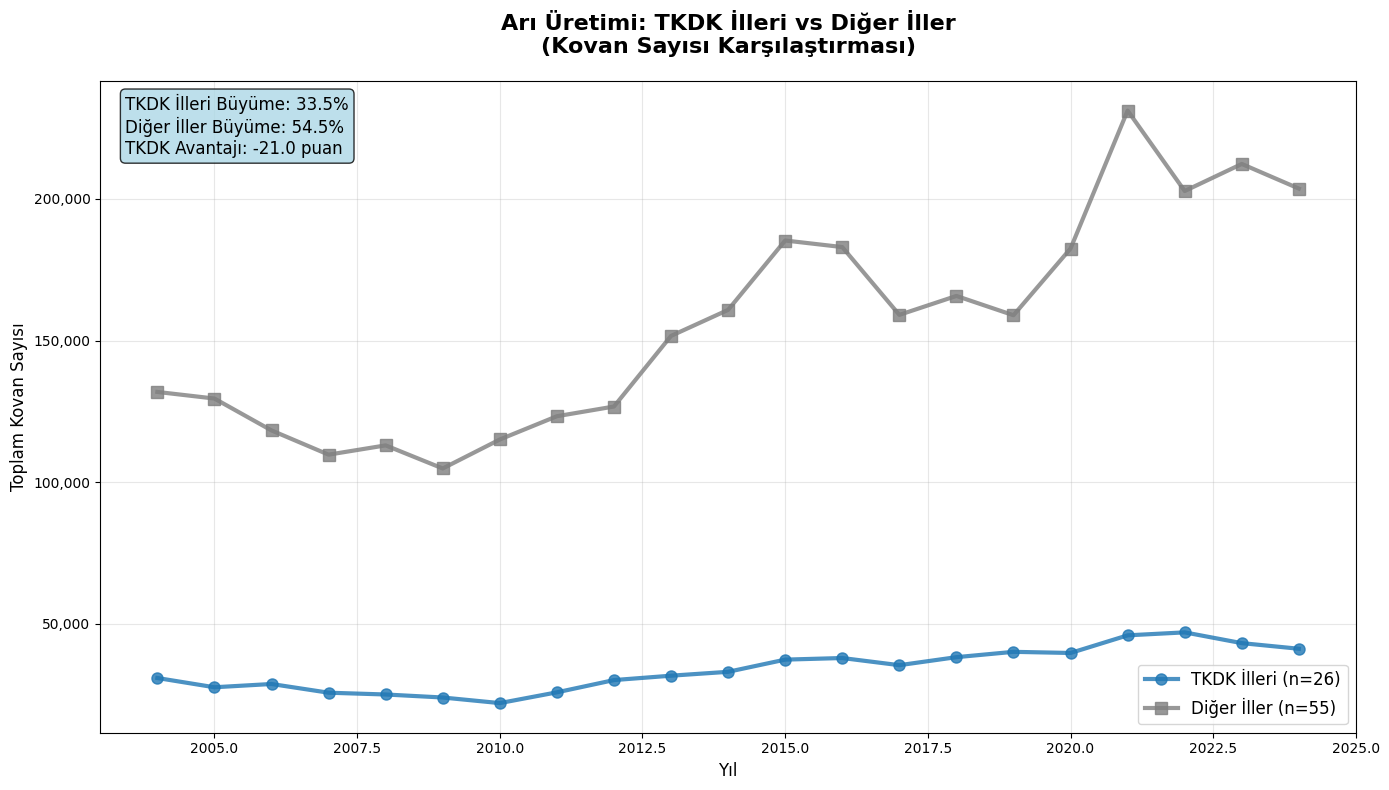


DETAYLI İSTATİSTİKLER:
TKDK İlleri - Toplam: 709,497
TKDK İlleri - Ortalama: 33,786
TKDK İlleri - Büyüme: 33.5%

Diğer İller - Toplam: 3,269,206
Diğer İller - Ortalama: 155,676
Diğer İller - Büyüme: 54.5%

TKDK Performans Avantajı: -21.0 puan

YILLIK KARŞILAŞTIRMA:
------------------------------
2004.0: TKDK=30,814, Diğer=131,846
2005.0: TKDK=27,545, Diğer=129,514
2006.0: TKDK=28,696, Diğer=118,254
2007.0: TKDK=25,622, Diğer=109,696
2008.0: TKDK=24,991, Diğer=112,972
2009.0: TKDK=23,926, Diğer=104,817
2010.0: TKDK=21,951, Diğer=115,049
2011.0: TKDK=25,753, Diğer=123,267
2012.0: TKDK=30,081, Diğer=126,696
2013.0: TKDK=31,632, Diğer=151,633
2014.0: TKDK=32,999, Diğer=160,826
2015.0: TKDK=37,305, Diğer=185,330
2016.0: TKDK=37,872, Diğer=183,010
2017.0: TKDK=35,343, Diğer=159,063
2018.0: TKDK=38,172, Diğer=165,750
2019.0: TKDK=40,057, Diğer=158,935
2020.0: TKDK=39,654, Diğer=182,498
2021.0: TKDK=45,882, Diğer=231,207
2022.0: TKDK=46,930, Diğer=202,808
2023.0: TKDK=43,128, Diğer=212,366
20

In [ ]:
# Analysis for bee production category
bee_category = '01.49.19.01.01. (Arılar (Kovan Halinde), Eski Tip) ve Kovan Sayısı'

# Filter data for bee production
bee_data = df[df['Category'] == bee_category].copy()

if not bee_data.empty:
    # Get TKDK and non-TKDK columns
    tkdk_columns = [col for col in bee_data.columns if col.startswith('tk_')]
    other_columns = [col for col in bee_data.columns if col not in ['Category', 'Year'] and not col.startswith('tk_')]
    
    print(f"TKDK provinces found: {len(tkdk_columns)}")
    print(f"Other provinces found: {len(other_columns)}")
    
    # Prepare aggregated data
    aggregated_data = []
    
    for _, row in bee_data.iterrows():
        year = row['Year']
        
        # Sum TKDK provinces
        tkdk_total = sum([row[col] for col in tkdk_columns if pd.notna(row[col])])
        
        # Sum other provinces  
        other_total = sum([row[col] for col in other_columns if pd.notna(row[col])])
        
        aggregated_data.append({
            'Year': year,
            'TKDK_Total': tkdk_total,
            'Other_Total': other_total
        })
    
    agg_df = pd.DataFrame(aggregated_data)
    
    # Create visualization
    plt.figure(figsize=(14, 8))
    
    # Plot trends
    plt.plot(agg_df['Year'], agg_df['TKDK_Total'], 
             color='#1f77b4', linewidth=3, marker='o', markersize=8, 
             label=f'TKDK İlleri (n={len(tkdk_columns)})', alpha=0.8)
    
    plt.plot(agg_df['Year'], agg_df['Other_Total'], 
             color='#7f7f7f', linewidth=3, marker='s', markersize=8, 
             label=f'Diğer İller (n={len(other_columns)})', alpha=0.8)
    
    # Calculate growth rates
    if len(agg_df) > 1:
        tkdk_growth = ((agg_df['TKDK_Total'].iloc[-1] - agg_df['TKDK_Total'].iloc[0]) / 
                      agg_df['TKDK_Total'].iloc[0] * 100)
        other_growth = ((agg_df['Other_Total'].iloc[-1] - agg_df['Other_Total'].iloc[0]) / 
                       agg_df['Other_Total'].iloc[0] * 100)
    else:
        tkdk_growth = other_growth = 0
    
    # Add growth rate annotation
    plt.text(0.02, 0.98, 
             f'TKDK İlleri Büyüme: {tkdk_growth:.1f}%\n'
             f'Diğer İller Büyüme: {other_growth:.1f}%\n'
             f'TKDK Avantajı: {tkdk_growth - other_growth:.1f} puan', 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
             fontsize=12)
    
    plt.title('Arı Üretimi: TKDK İlleri vs Diğer İller\n(Kovan Sayısı Karşılaştırması)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Yıl', fontsize=12)
    plt.ylabel('Toplam Kovan Sayısı', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Format y-axis with thousand separators
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nDETAYLI İSTATİSTİKLER:")
    print("=" * 50)
    print(f"TKDK İlleri - Toplam: {agg_df['TKDK_Total'].sum():,.0f}")
    print(f"TKDK İlleri - Ortalama: {agg_df['TKDK_Total'].mean():,.0f}")
    print(f"TKDK İlleri - Büyüme: {tkdk_growth:.1f}%")
    print()
    print(f"Diğer İller - Toplam: {agg_df['Other_Total'].sum():,.0f}")
    print(f"Diğer İller - Ortalama: {agg_df['Other_Total'].mean():,.0f}")
    print(f"Diğer İller - Büyüme: {other_growth:.1f}%")
    print()
    print(f"TKDK Performans Avantajı: {tkdk_growth - other_growth:.1f} puan")
    
    # Show year-by-year data
    print("\nYILLIK KARŞILAŞTIRMA:")
    print("-" * 30)
    for _, row in agg_df.iterrows():
        print(f"{row['Year']}: TKDK={row['TKDK_Total']:,.0f}, Diğer={row['Other_Total']:,.0f}")
        
else:
    print("Arı üretimi kategorisi bulunamadı!")


In [ ]:
# Analysis for cattle milk production category
milk_category = '01.41.20.01.02. (Sığır Sütü (Kültür Melezi) (Manda Sütü Hariç)) ve Ton'

# Filter data for milk production
milk_data = df[df['Category'] == milk_category].copy()

if not milk_data.empty:
    # Get TKDK and non-TKDK columns
    tkdk_columns = [col for col in milk_data.columns if col.startswith('tk_')]
    other_columns = [col for col in milk_data.columns if col not in ['Category', 'Year'] and not col.startswith('tk_')]
    
    print(f"TKDK provinces found: {len(tkdk_columns)}")
    print(f"Other provinces found: {len(other_columns)}")
    
    # Prepare aggregated data
    aggregated_data = []
    
    for _, row in milk_data.iterrows():
        year = row['Year']
        
        # Sum TKDK provinces
        tkdk_total = sum([row[col] for col in tkdk_columns if pd.notna(row[col])])
        
        # Sum other provinces  
        other_total = sum([row[col] for col in other_columns if pd.notna(row[col])])
        
        aggregated_data.append({
            'Year': year,
            'TKDK_Total': tkdk_total,
            'Other_Total': other_total
        })
    
    agg_df = pd.DataFrame(aggregated_data)
    
    # Create visualization
    plt.figure(figsize=(14, 8))
    
    # Plot trends
    plt.plot(agg_df['Year'], agg_df['TKDK_Total'], 
             color='#1f77b4', linewidth=3, marker='o', markersize=8, 
             label=f'TKDK İlleri (n={len(tkdk_columns)})', alpha=0.8)
    
    plt.plot(agg_df['Year'], agg_df['Other_Total'], 
             color='#7f7f7f', linewidth=3, marker='s', markersize=8, 
             label=f'Diğer İller (n={len(other_columns)})', alpha=0.8)
    
    # Calculate growth rates
    if len(agg_df) > 1:
        tkdk_growth = ((agg_df['TKDK_Total'].iloc[-1] - agg_df['TKDK_Total'].iloc[0]) / 
                      agg_df['TKDK_Total'].iloc[0] * 100)
        other_growth = ((agg_df['Other_Total'].iloc[-1] - agg_df['Other_Total'].iloc[0]) / 
                       agg_df['Other_Total'].iloc[0] * 100)
    else:
        tkdk_growth = other_growth = 0
    
    # Add growth rate annotation
    plt.text(0.02, 0.98, 
             f'TKDK İlleri Büyüme: {tkdk_growth:.1f}%\n'
             f'Diğer İller Büyüme: {other_growth:.1f}%\n'
             f'TKDK Avantajı: {tkdk_growth - other_growth:.1f} puan', 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
             fontsize=12)
    
    plt.title('Sığır Sütü Üretimi: TKDK İlleri vs Diğer İller\n(Kültür Melezi - Ton Karşılaştırması)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Yıl', fontsize=12)
    plt.ylabel('Toplam Üretim (Ton)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Format y-axis with thousand separators
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nDETAYLI İSTATİSTİKLER:")
    print("=" * 50)
    print(f"TKDK İlleri - Toplam: {agg_df['TKDK_Total'].sum():,.0f} ton")
    print(f"TKDK İlleri - Ortalama: {agg_df['TKDK_Total'].mean():,.0f} ton")
    print(f"TKDK İlleri - Büyüme: {tkdk_growth:.1f}%")
    print()
    print(f"Diğer İller - Toplam: {agg_df['Other_Total'].sum():,.0f} ton")
    print(f"Diğer İller - Ortalama: {agg_df['Other_Total'].mean():,.0f} ton")
    print(f"Diğer İller - Büyüme: {other_growth:.1f}%")
    print()
    print(f"TKDK Performans Avantajı: {tkdk_growth - other_growth:.1f} puan")
    
    # Show year-by-year data
    print("\nYILLIK KARŞILAŞTIRMA:")
    print("-" * 30)
    for _, row in agg_df.iterrows():
        print(f"{row['Year']}: TKDK={row['TKDK_Total']:,.0f} ton, Diğer={row['Other_Total']:,.0f} ton")
        
else:
    print("Sığır sütü üretimi kategorisi bulunamadı!")


'01.41.20.01.02. (Sığır Sütü (Kültür Melezi) (Manda Sütü Hariç)) ve Ton'